In [19]:
import os
import tarfile
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import scipy
import gc

In [20]:
# Set the working directory
working_dir = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SET/GSE212252"
os.chdir(working_dir)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SET/GSE212252


In [21]:
data_path = './DATA/POST_NATAL_CRE_POSITIVE'
adata = sc.read_10x_mtx(
    data_path,
    var_names='gene_symbols',
    cache=True
)

In [22]:
adata

AnnData object with n_obs × n_vars = 736108 × 32286
    var: 'gene_ids', 'feature_types'

In [23]:
adata.obs.head()

""
AAACAGCCAAACAACA-1
AAACAGCCAAACATAG-1
AAACAGCCAAACCCTA-1
AAACAGCCAAACCTAT-1
AAACAGCCAAACCTTG-1


In [24]:
adata.X

<736108x32286 sparse matrix of type '<class 'numpy.float32'>'
	with 50580184 stored elements in Compressed Sparse Column format>

In [25]:
non_zero_elements = adata.X.data[:10] if scipy.sparse.issparse(adata.X) else adata.X[np.nonzero(adata.X)][:10]

print("First 10 non-zero elements of adata.X:")
print(non_zero_elements)

First 10 non-zero elements of adata.X:
[ 3.  3.  2.  2.  9.  1. 16.  3.  6.  1.]


In [26]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [27]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

In [28]:
adata.var.head()

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
Xkr4,ENSMUSG00000051951,Gene Expression,7578,False,7578,1.083062,0.733839,76.238555,34541.0,10.449931
Gm1992,ENSMUSG00000089699,Gene Expression,472,False,472,0.016493,0.016359,98.520005,526.0,6.267200
Gm19938,ENSMUSG00000102331,Gene Expression,1602,False,1602,0.064750,0.062740,94.976797,2065.0,7.633369
Gm37381,ENSMUSG00000102343,Gene Expression,17,False,17,0.000972,0.000972,99.946695,31.0,3.465736
Rp1,ENSMUSG00000025900,Gene Expression,436,False,436,0.028095,0.027707,98.632886,896.0,6.799056


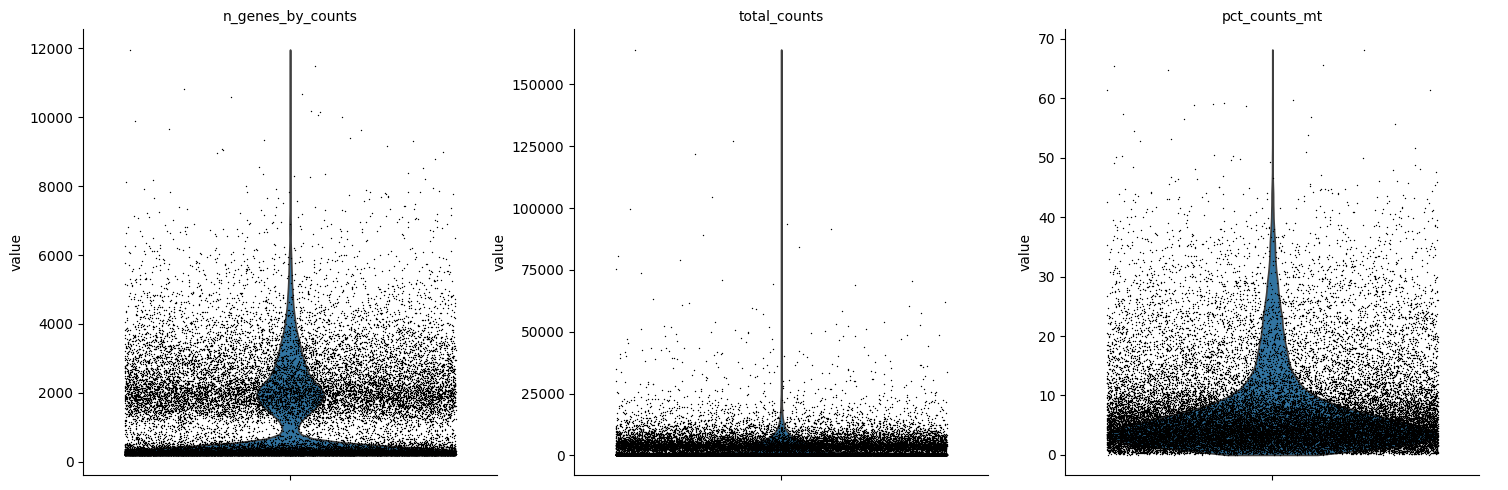

In [29]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [30]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.total_counts < 10000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]
gc.collect()

26262

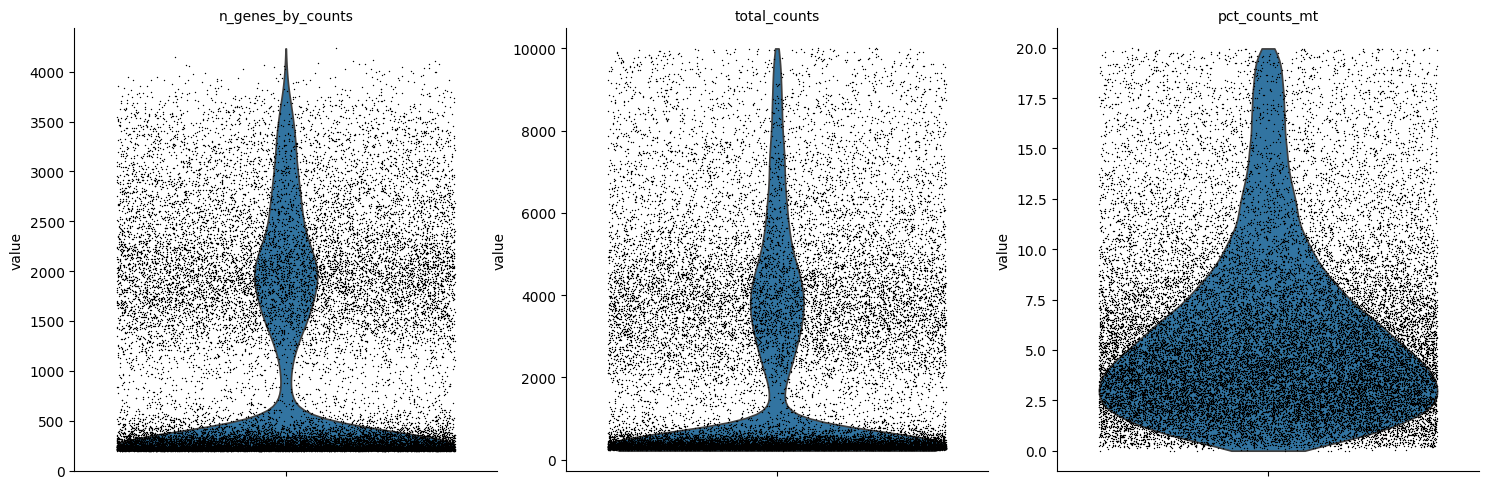

In [31]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [32]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/home/kubacki.michal/.conda/envs/jupyter_nb/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [33]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [34]:
sc.pp.pca(adata, n_comps=50)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

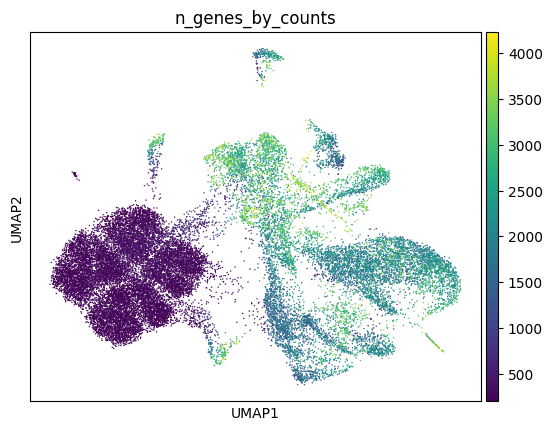

In [35]:
sc.pl.umap(adata, color=['n_genes_by_counts'], wspace=0.4)


In [36]:
adata.write('./output/processed_post_natal_cre_positive_data.h5ad')
